# KNN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
teams_68 = pd.read_csv(os.path.join('final_dataset68.csv')).fillna(0).drop(columns=['Unnamed: 0'])
teams_353 = pd.read_csv(os.path.join('final_dataset353.csv')).fillna(0).drop(columns=['Unnamed: 0'])

In [3]:
bins = [0, 1, 2, 3, 4, 5, 6]
group_names = ["First/2nd Round Exit", "Sweet Sixteen", "Elite 8", "Final Four", "Semi-Finalist", "Champion"]

teams_68['Outcome'] = pd.cut(teams_68['TourneyWins'], bins, labels=group_names)

teams_68 = teams_68.fillna('First/2nd Round Exit')

teams_68['TourneyWins'] = teams_68['TourneyWins'].astype(int)

In [4]:
labels = {
    0:"First/2nd Round Exit",
    1:"First/2nd Round Exit",
    2:"Sweet Sixteen",
    3:"Elite 8",
    4:"Final Four",
    5:"Semi-Finalist",
    6:'Champion'    
}

In [5]:
x = teams_68.iloc[:, 1:16].values

y = teams_68.iloc[:, -2].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
# Create a StandardScater model and fit it to the training data

x_scaler = StandardScaler().fit(x_train.reshape(-1, 1))

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

k: 1, Train/Test Score: 1.000/0.435
k: 3, Train/Test Score: 0.667/0.435
k: 5, Train/Test Score: 0.667/0.522
k: 7, Train/Test Score: 0.622/0.522
k: 9, Train/Test Score: 0.578/0.478
k: 11, Train/Test Score: 0.578/0.435
k: 13, Train/Test Score: 0.489/0.478
k: 15, Train/Test Score: 0.489/0.522
k: 17, Train/Test Score: 0.467/0.522
k: 19, Train/Test Score: 0.489/0.522
k: 21, Train/Test Score: 0.511/0.565
k: 23, Train/Test Score: 0.511/0.565
k: 25, Train/Test Score: 0.511/0.565
k: 27, Train/Test Score: 0.511/0.565
k: 29, Train/Test Score: 0.511/0.565


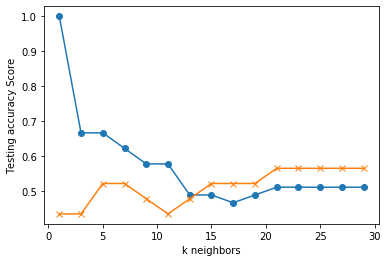

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    test_score = knn.score(x_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_scaled, y_train)
print('k=20 Test Acc: %.3f' % knn.score(x_test_scaled, y_test))

k=20 Test Acc: 0.565


# PREDICTIONS

In [19]:
virginia = teams_68.loc[teams_68['Name'] == "Virginia"].drop(columns=['Name','TourneyWins','Outcome']).values
unc = teams_68.loc[teams_68['Name'] == 'North Carolina'].drop(columns=['Name','TourneyWins','Outcome']).values
duke = teams_68.loc[teams_68['Name'] == 'Duke'].drop(columns=['Name','TourneyWins','Outcome']).values

In [21]:
virginia_scaled = x_scaler.transform(virginia)
predicted_class = knn.predict(virginia_scaled)
print(f"Prediction: {labels[predicted_class[0]]}")

Prediction: First/2nd Round Exit


In [23]:
duke_scaled = x_scaler.transform(duke)
predicted_class = knn.predict(duke_scaled)
print(f"Prediction: {labels[predicted_class[0]]}")

Prediction: First/2nd Round Exit


In [24]:
unc_scaled = x_scaler.transform(unc)
predicted_class = knn.predict(unc_scaled)
print(f"Prediction: {labels[predicted_class[0]]}")

Prediction: First/2nd Round Exit
